# Incidence de la varicelle

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

Les données ont été téléchargées sur le site du réseau sentinelles à l'[adresse suivante](http://www.sentiweb.fr/datasets/incidence-PAY-3.csv) et stockée sur le dossier gitlab disponible via ce [lien](https://app-learninglab.inria.fr/moocrr/gitlab/b2c48a7ab4afbff5f4d26650b09eb6b4/mooc-rr/blob/master/module3/exo1/incidence-PAY-3.csv).

In [38]:
data_url = "https://app-learninglab.inria.fr/moocrr/gitlab/b2c48a7ab4afbff5f4d26650b09eb6b4/mooc-rr/raw/master/module3/exo1/incidence-PAY-7.csv?inline=false"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [39]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202013          7   8030     5638   10422      12           8   
1     202012          7   8192     5822   10562      12           8   
2     202011          7  10198     7568   12828      15          11   
3     202010          7   9011     6691   11331      14          10   
4     202009          7  13631    10544   16718      21          16   
5     202008          7  10424     7708   13140      16          12   
6     202007          7   8959     6574   11344      14          10   
7     202006          7   9264     6925   11603      14          10   
8     202005          7   8505     6314   10696      13          10   
9     202004          7   7991     5831   10151      12           9   
10    202003          7   5968     4100    7836       9           6   
11    202002          7   6534     4530    8538      10           7   
12    202001          7   9835     7019   12651      15          11   
13    201952          7   7941     5246   10636      12           8   
14    201951          7   5823     3675    7971       9           6   
15    201950          7   6424     4276    8572      10           7   
16    201949          7   6621     4540    8702      10           7   
17    201948          7   5542     3383    7701       8           5   
18    201947          7   7536     5058   10014      11           7   
19    201946          7   2638     1316    3960       4           2   
20    201945          7   4492     2615    6369       7           4   
21    201944          7   5728     3627    7829       9           6   
22    201943          7   4834     2751    6917       7           4   
23    201942          7   6279     3989    8569      10           7   
24    201941          7   4130     2030    6230       6           3   
25    201940          7   4211     2218    6204       6           3   
26    201939          7   3137     1310    4964       5           2   
27    201938          7   3078     1416    4740       5           2   
28    201937          7    970      162    1778       1           0   
29    201936          7   1277      263    2291       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1500  199126          7  17608    11304   23912      31          20   
1501  199125          7  16169    10700   21638      28          18   
1502  199124          7  16171    10071   22271      28          17   
1503  199123          7  11947     7671   16223      21          13   
1504  199122          7  15452     9953   20951      27          17   
1505  199121          7  14903     8975   20831      26          16   
1506  199120          7  19053    12742   25364      34          23   
1507  199119          7  16739    11246   22232      29          19   
1508  199118          7  21385    13882   28888      38          25   
1509  199117          7  13462     8877   18047      24          16   
1510  199116          7  14857    10068   19646      26          18   
1511  199115          7  13975     9781   18169      25          18   
1512  199114          7  12265     7684   16846      22          14   
1513  199113          7   9567     6041   13093      17          11   
1514  199112          7  10864     7331   14397      19          13   
1515  199111          7  15574    11184   19964      27          19   
1516  199110          7  16643    11372   21914      29          20   
1517  199109          7  13741     8780   18702      24          15   
1518  199108          7  13289     8813   17765      23          15   
1519  199107          7  12337     8077   16597      22          15   
1520  199106          7  10877     7013   14741      19          12   
1521  199105          7  10442     6544   14340      18          11   
1522  199104          7   7913     4563   11263      14           8   
1523  199103          7  15387    10484   20290      27          18   
1524  199102          7  16277  

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [40]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [41]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202013          7   8030     5638   10422      12           8   
1     202012          7   8192     5822   10562      12           8   
2     202011          7  10198     7568   12828      15          11   
3     202010          7   9011     6691   11331      14          10   
4     202009          7  13631    10544   16718      21          16   
5     202008          7  10424     7708   13140      16          12   
6     202007          7   8959     6574   11344      14          10   
7     202006          7   9264     6925   11603      14          10   
8     202005          7   8505     6314   10696      13          10   
9     202004          7   7991     5831   10151      12           9   
10    202003          7   5968     4100    7836       9           6   
11    202002          7   6534     4530    8538      10           7   
12    202001          7   9835     7019   12651      15          11   
13    201952          7   7941     5246   10636      12           8   
14    201951          7   5823     3675    7971       9           6   
15    201950          7   6424     4276    8572      10           7   
16    201949          7   6621     4540    8702      10           7   
17    201948          7   5542     3383    7701       8           5   
18    201947          7   7536     5058   10014      11           7   
19    201946          7   2638     1316    3960       4           2   
20    201945          7   4492     2615    6369       7           4   
21    201944          7   5728     3627    7829       9           6   
22    201943          7   4834     2751    6917       7           4   
23    201942          7   6279     3989    8569      10           7   
24    201941          7   4130     2030    6230       6           3   
25    201940          7   4211     2218    6204       6           3   
26    201939          7   3137     1310    4964       5           2   
27    201938          7   3078     1416    4740       5           2   
28    201937          7    970      162    1778       1           0   
29    201936          7   1277      263    2291       2           0   
...      ...        ...    ...      ...     ...     ...         ...   
1500  199126          7  17608    11304   23912      31          20   
1501  199125          7  16169    10700   21638      28          18   
1502  199124          7  16171    10071   22271      28          17   
1503  199123          7  11947     7671   16223      21          13   
1504  199122          7  15452     9953   20951      27          17   
1505  199121          7  14903     8975   20831      26          16   
1506  199120          7  19053    12742   25364      34          23   
1507  199119          7  16739    11246   22232      29          19   
1508  199118          7  21385    13882   28888      38          25   
1509  199117          7  13462     8877   18047      24          16   
1510  199116          7  14857    10068   19646      26          18   
1511  199115          7  13975     9781   18169      25          18   
1512  199114          7  12265     7684   16846      22          14   
1513  199113          7   9567     6041   13093      17          11   
1514  199112          7  10864     7331   14397      19          13   
1515  199111          7  15574    11184   19964      27          19   
1516  199110          7  16643    11372   21914      29          20   
1517  199109          7  13741     8780   18702      24          15   
1518  199108          7  13289     8813   17765      23          15   
1519  199107          7  12337     8077   16597      22          15   
1520  199106          7  10877     7013   14741      19          12   
1521  199105          7  10442     6544   14340      18          11   
1522  199104          7   7913     4563   11263      14           8   
1523  199103          7  15387    10484   20290      27          18   
1524  199102          7  16277  

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [42]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [43]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [44]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Un premier regard sur les données !

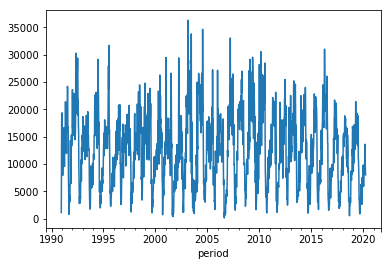

In [45]:
sorted_data['inc'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

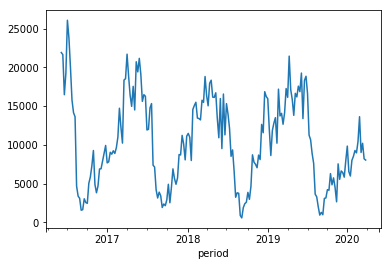

In [46]:
sorted_data['inc'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [47]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [48]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

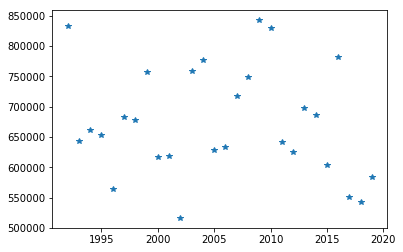

In [49]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [50]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

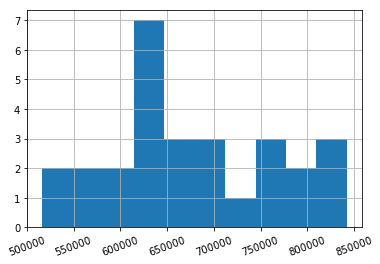

In [51]:
yearly_incidence.hist(xrot=20)